In [1]:
from datasets import TVUSUterusSegmentationDataset
from torch.utils.data import DataLoader
from torchvision import transforms
import cv2
import numpy as np
import torch

In [2]:
class NonRandomHorizontalFlip:
    def __init__(self, flip_probability=0.5):
        self.flip_probability = flip_probability

    def __call__(self, sample):
        if torch.rand(1).item() < self.flip_probability:
            # Flip the image horizontally
            sample = torch.flip(sample, dims=[-1])
        return sample

data_root_folder = '/home/sandbox/dtank/my-scratch/data/'

# Transforms
augs = transforms.Compose([         transforms.Grayscale(),
                                    transforms.RandomApply([transforms.RandomRotation(5)], p=0.3),
                                    transforms.ToTensor(),
                                    NonRandomHorizontalFlip(flip_probability=0.3)
                        ])

trans = transforms.Compose([transforms.Grayscale(),
                            transforms.ToTensor()])

def get_dataloaders(imaging_type, batch_size, img_size, clahe=False, padding=False, augmentations=False,):
    
    if augmentations:
        train_trans = augs
    else:
        train_trans = trans

    if imaging_type == "STILL":
        # STILL #
        # Datasets
        STILL_train_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/train/', data_root_folder+'mask/train/', 'STILL', resize=img_size, clahe=clahe, padding=padding, transform=train_trans)
        STILL_test_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/test/', data_root_folder+'mask/test/', 'STILL', resize=img_size, clahe=clahe, padding=padding, transform=trans)
        STILL_val_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/validation/', data_root_folder+'mask/validation/', 'STILL', resize=img_size, clahe=clahe, padding=padding, transform=trans)

        # Dataloaders
        STILL_train_dataloader = DataLoader(STILL_train_dataset, batch_size=batch_size, shuffle=False)
        STILL_test_dataloader = DataLoader(STILL_test_dataset, batch_size=batch_size, shuffle=False)
        STILL_val_dataloader = DataLoader(STILL_val_dataset, batch_size=batch_size, shuffle=False)
        return STILL_train_dataloader, STILL_val_dataloader, STILL_test_dataloader
    
    elif imaging_type == "VIDEO":
        # VIDEO #
        # Datasets 
        VIDEO_train_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/train', data_root_folder+'mask/train', 'VIDEO', resize=img_size, clahe=clahe, padding=padding, transform=trans)
        VIDEO_test_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/test', data_root_folder+'mask/test', 'VIDEO', resize=img_size, clahe=clahe, padding=padding, transform=trans)
        VIDEO_val_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/validation', data_root_folder+'mask/validation', 'VIDEO', resize=img_size, padding=padding, clahe=clahe, transform=trans)

        # Dataloaders
        VIDEO_train_dataloader = DataLoader(VIDEO_train_dataset, batch_size=batch_size, shuffle=False)
        VIDEO_test_dataloader = DataLoader(VIDEO_test_dataset, batch_size=batch_size, shuffle=False)
        VIDEO_val_dataloader = DataLoader(VIDEO_val_dataset, batch_size=batch_size, shuffle=False)
        return VIDEO_train_dataloader, VIDEO_val_dataloader, VIDEO_test_dataloader
    
    elif imaging_type == "3D":
        # 3D #
        # Datasets
        VOLUME_train_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/train', data_root_folder+'mask/train', '3D', resize=img_size, clahe=clahe, padding=padding, transform=trans)
        VOLUME_test_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/test', data_root_folder+'mask/test', '3D', resize=img_size, clahe=clahe, padding=padding, transform=trans)
        VOLUME_val_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/validation', data_root_folder+'mask/validation', '3D', resize=img_size, clahe=clahe, padding=padding, transform=trans)

        # Dataloaders
        VOLUME_train_dataloader = DataLoader(VOLUME_train_dataset, batch_size=batch_size, shuffle=False)
        VOLUME_test_dataloader = DataLoader(VOLUME_test_dataset, batch_size=batch_size, shuffle=False)
        VOLUME_val_dataloader = DataLoader(VOLUME_val_dataset, batch_size=batch_size, shuffle=False)
        return VOLUME_train_dataloader, VOLUME_val_dataloader, VOLUME_test_dataloader

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def show_data(dataloader):
    # Get a batch of images
    for batch in dataloader:
        images, _ = batch
        break  # Exit after the first batch

    # Convert tensor to numpy array
    images = images.numpy()

    # Create a grid of 4x2 images
    num_images = images.shape[0]
    num_rows = 2
    num_cols = 4

    # Ensure we have enough images
    if num_rows * num_cols < num_images:
        num_cols += 1

    # Plot the images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(np.transpose(images[i], (1, 2, 0)), cmap='gray')  # Assuming images are of shape (C, H, W)
            ax.axis('off')
        else:
            ax.axis('off')  # Hide extra subplots

    plt.show()


# Normal data

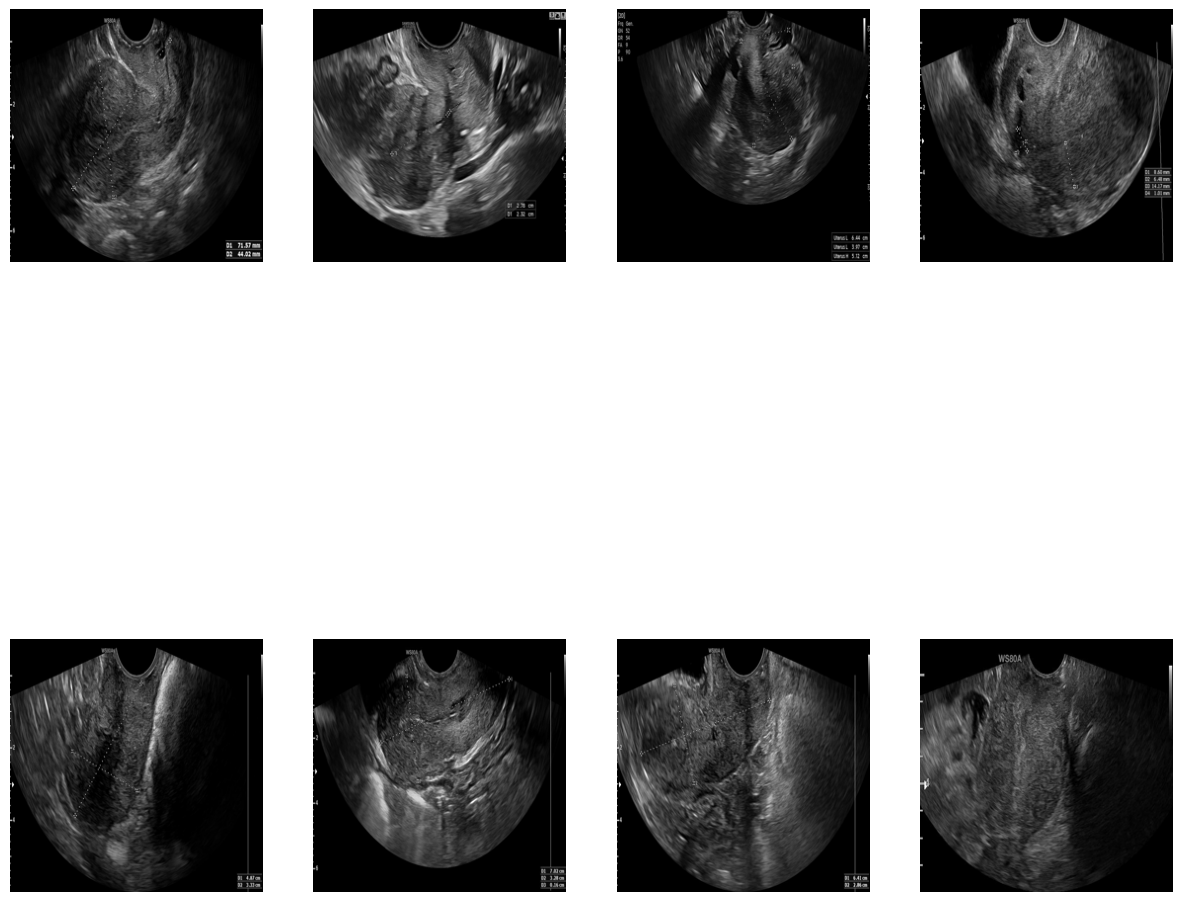

In [5]:
STILL_train_dataloader, STILL_val_dataloader, STILL_test_dataloader = get_dataloaders("STILL", 8, 256, clahe=False, padding=False, augmentations=False)
show_data(STILL_train_dataloader)

# Clahe

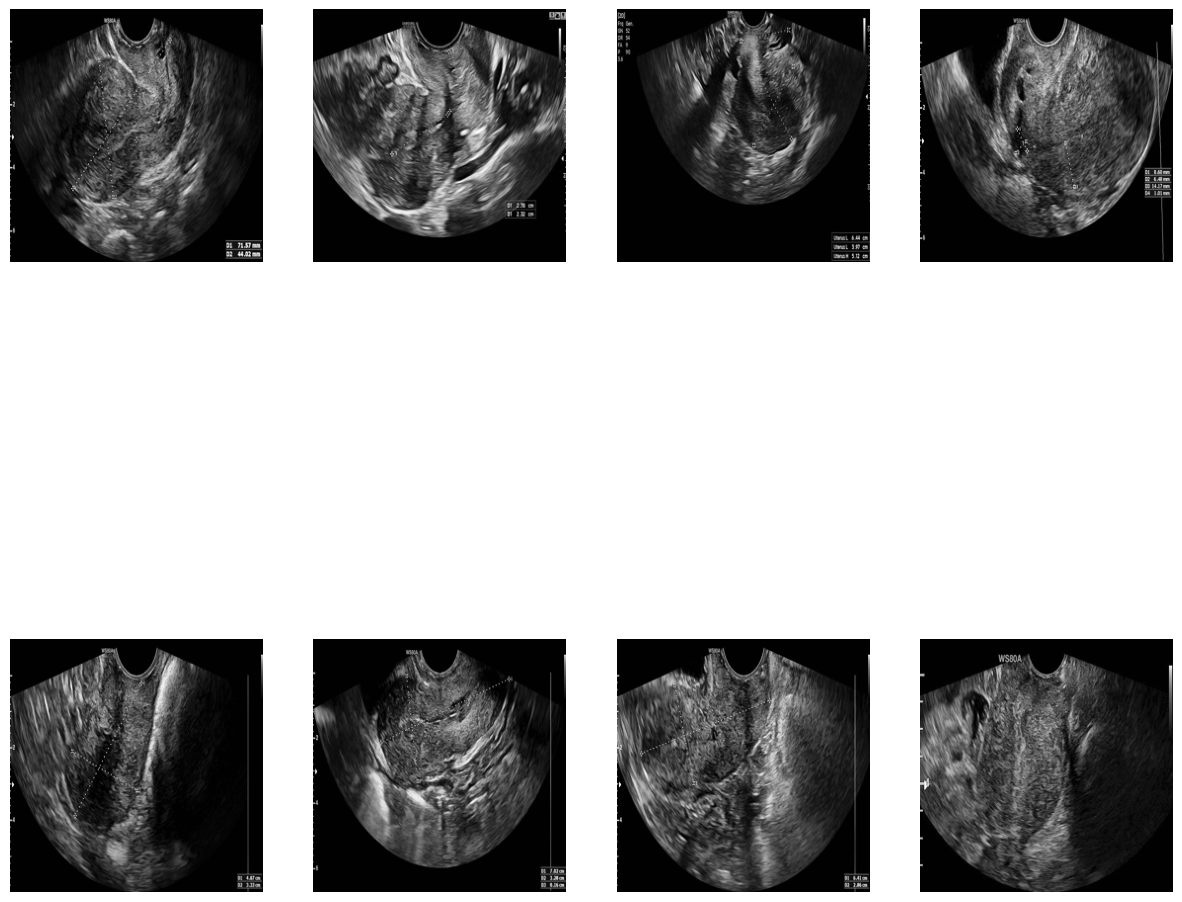

In [6]:
STILL_train_dataloader, _, _ = get_dataloaders("STILL", 8, 256, clahe=True, padding=False, augmentations=False)
show_data(STILL_train_dataloader)

# Horizontal flip

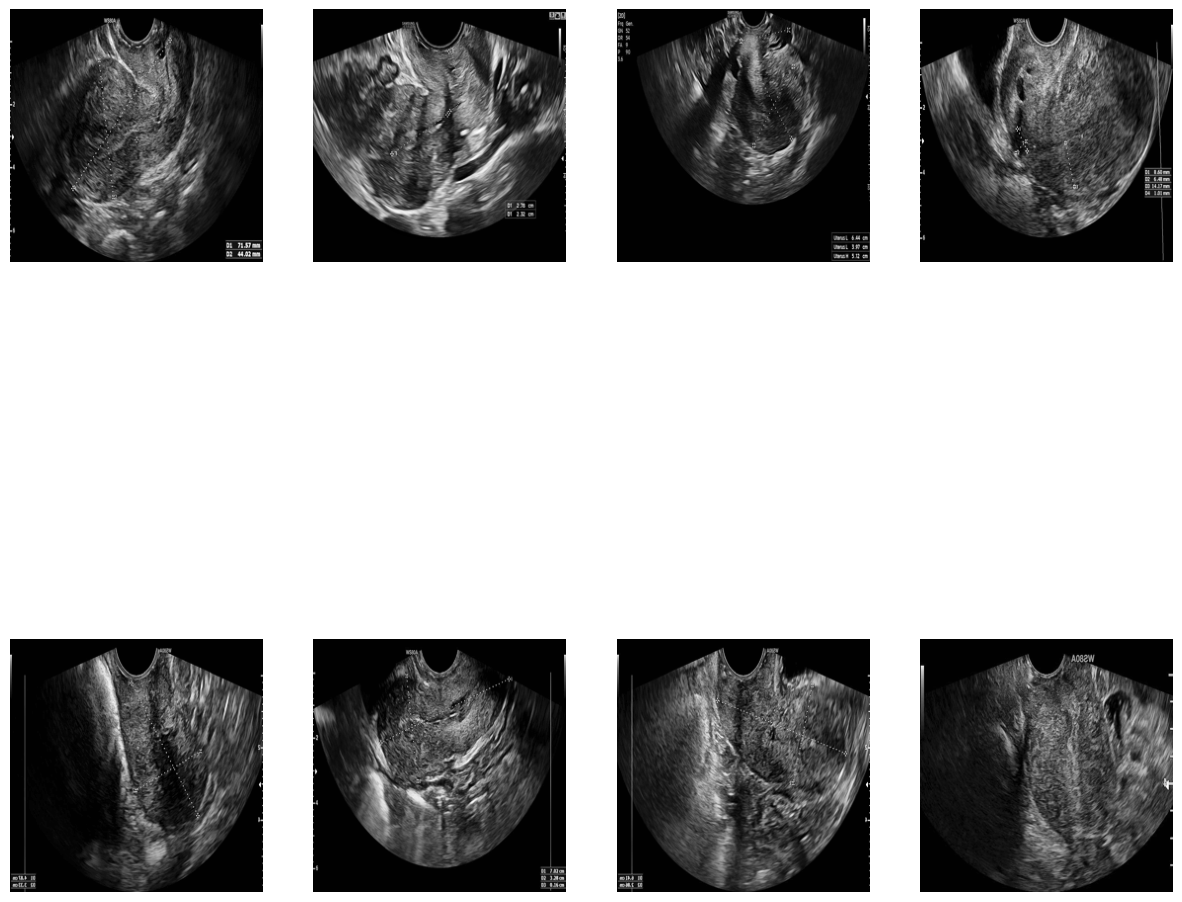

In [12]:
STILL_train_dataloader, _, _ = get_dataloaders("STILL", 8, 256, clahe=True, padding=False, augmentations=True)
show_data(STILL_train_dataloader)

# Random Rotations

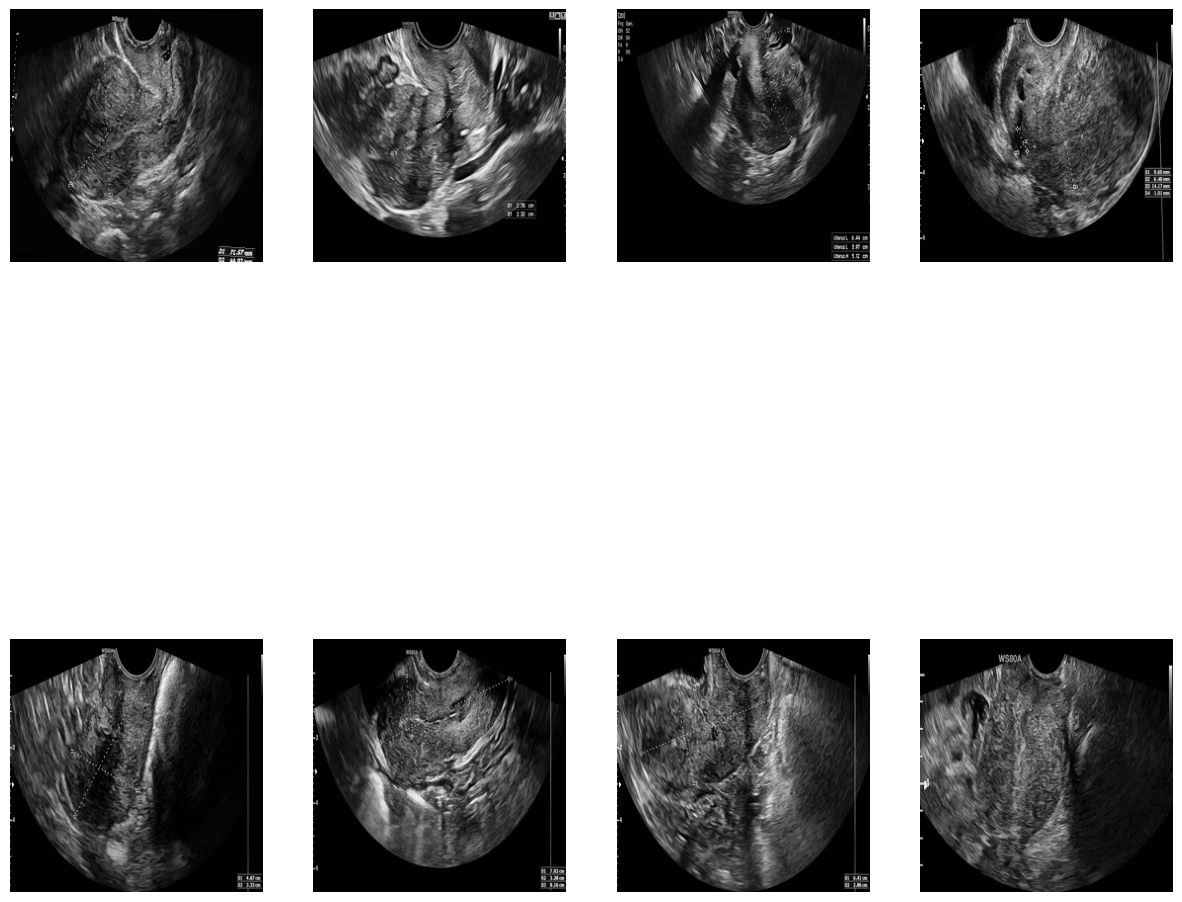

In [17]:
STILL_train_dataloader, _, _ = get_dataloaders("STILL", 8, 256, clahe=True, padding=False, augmentations=True)
show_data(STILL_train_dataloader)

# ALL

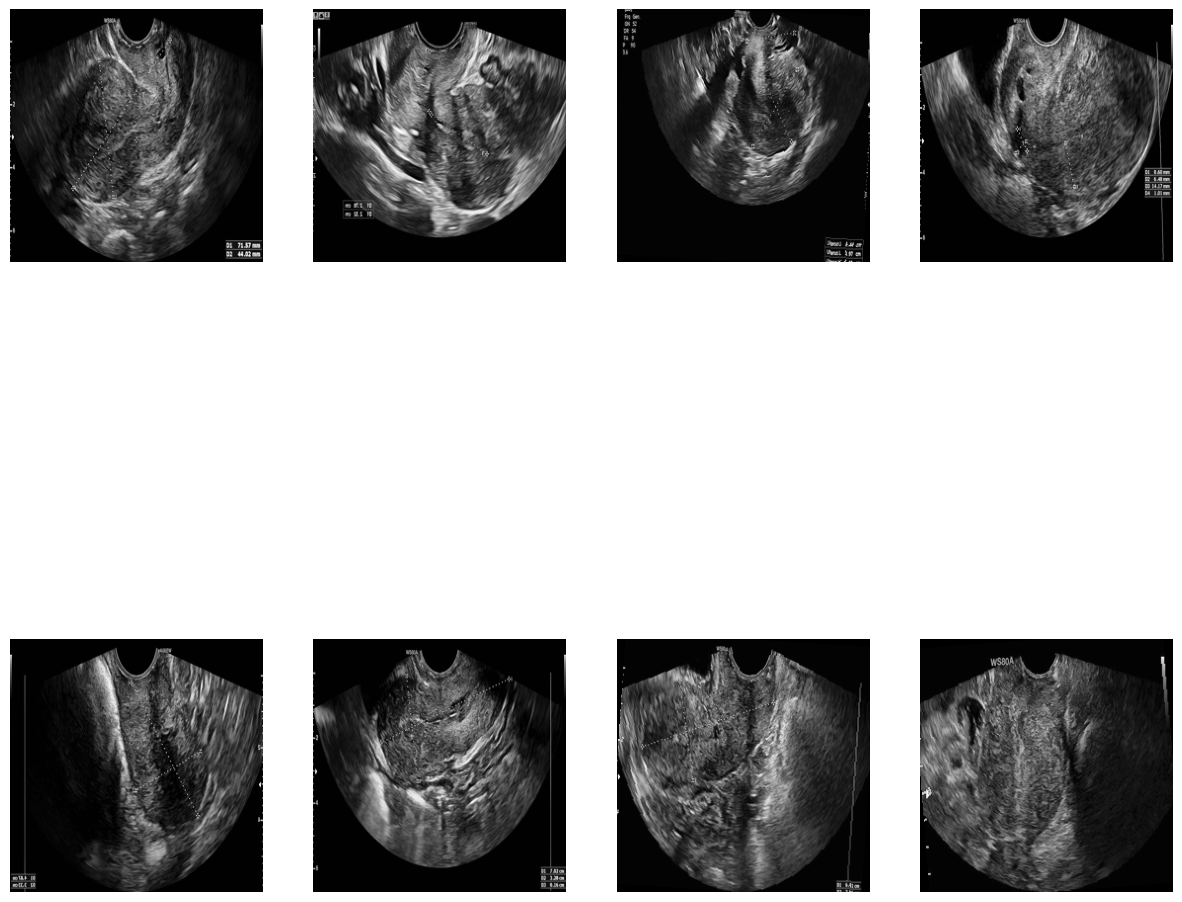

In [21]:
STILL_train_dataloader, _, _ = get_dataloaders("STILL", 8, 256, clahe=True, padding=False, augmentations=True)
show_data(STILL_train_dataloader)

# Denoising

In [9]:
import matplotlib.pyplot as plt

def display_images(image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a grid with 1 row and 2 columns

    # Display the first image on the left
    axes[0].imshow(image1)
    axes[0].set_title('Original')

    # Display the second image on the right
    axes[1].imshow(image2)
    axes[1].set_title('Denoised')

    plt.show()

/home/sandbox/dtank/tmp/ipykernel_3290512/1426777749.py:112: RuntimeWarning: divide by zero encountered in divide
  q = np.sqrt(np.divide(temp1,temp3))
/home/sandbox/dtank/tmp/ipykernel_3290512/1426777749.py:171: RuntimeWarning: divide by zero encountered in divide
  q = np.sqrt(np.divide(temp1,temp3))
/home/sandbox/dtank/tmp/ipykernel_3290512/1426777749.py:171: RuntimeWarning: invalid value encountered in sqrt
  q = np.sqrt(np.divide(temp1,temp3))
/home/sandbox/dtank/tmp/ipykernel_3290512/1426777749.py:228: RuntimeWarning: invalid value encountered in cast
  return despeckledImg.astype("uint8")


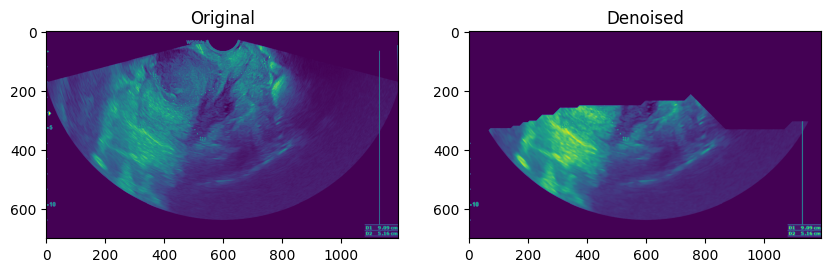

In [10]:
import numpy as np
import cv2

# functions

## SRAD function
def SRAD(img, iterationMaxStep, timeSize, decayFactor):

    # # function despeckledImg = MySRAD(img, iterationMaxStep, threshodConvergence, timeSize, decayFactor)
    # # Algorithm: Speckle Reducing Anisotropic Diffusion Method
    # # Input:
    # #   - img: the input image with speckle noise; data type [any kinds of], size N*M  
    # #   - interationMaxStep: the maximum iterative step; data type [integer(>0)]
    # #   - thresholdCovergence: the second ending rule for iteration; data type
    # #   [undefine]
    # #   - timeSize: the time step in each iteration; data type [float or
    # #   integer], scalar
    # #   - dacayFactor: the decay factor for the exp function related to
    # #   "smoothing and edge preserving"; data type [float, integer]. scalar

    # # Output:
    # #   - despeckledImg: the despeckled image; data type [same as the img], size
    # #   N*M

    # #
    # # INPUT PARAMETERS
    # #
    spatialSize = 1 ##spatial step size
    t = 0 ## starting timestap
    thresholdDiffusion = 0.0001 ## threshold for diffusion coefficient to guarantee the lower vaule (equals 0)
    thresholdConvergence = 10**(-13) ## one of the iteration determination conditions
    ROW, COL = img.shape ## input image size
    epsilon = 10**(-13) ## handle 0/0 case 

    iterationNumber = 0 ## variable of iterating step
    diviationConvergence = 1 ## the convergence diviation each iteration
   
    originalClass = type(img)

    img = img.astype('float32')
    #img = np.genfromtxt('test.txt', delimiter=',')
    

    img_i_j_ = img
    temp = img_i_j_[::spatialSize, :]
    img_i_j =temp[:,::spatialSize]
    
    ##   # translate one row (add + spatialSize)
    # #     img_ia1_j_ = [img; img((end-spatialSize+1) :end,:)];
    # #     img_ia1_j_(1:spatialSize,:) = [];
    # #     temp = img_ia1_j_(1:spatialSize:end,:);
    # #     img_ia1_j = temp(:,1:spatialSize:end);
    
    img_ia1_j = np.row_stack((img_i_j, img_i_j[-1,:]))
    img_ia1_j = img_ia1_j[1:,:]
    
    ##     # translate one row (subtraction - spatialSize)
    # #     img_is1_j_ = [img(1:spatialSize,:); img];
    # #     img_is1_j_((end-spatialSize+1):end,:) = [];
    # #     temp = img_is1_j_(1:spatialSize:end, :);
    # #     img_is1_j = temp(:, 1:spatialSize:end);
    
    img_is1_j = np.row_stack((img_i_j[0,:], img_i_j))
    img_is1_j = img_is1_j[:-1,:]

    ##     # translate one col (add + spatialSize)
    # #     img_i_ja1_ = [img img(:, (end-spatialSize+1):end)];
    # #     img_i_ja1_(:,1:spatialSize) = [];
    # #     temp = img_i_ja1_(1:spatialSize:end, :);
    # #     img_i_ja1 = temp(:, 1:spatialSize:end);
    
    img_i_ja1 = np.column_stack((img_i_j, img_i_j[:,-1]))
    img_i_ja1 = img_i_ja1[:,1:]
    
    
    #     # translate one col (subtraction - spatialSize)
    # #     img_i_js1_ = [img(:,1:spatialSize) img];
    # #     img_i_js1_(:,(end-spatialSize+1):end) = [];
    # #     temp = img_i_js1_(1:spatialSize:end, :);
    # #     img_i_js1 = temp(:, 1:spatialSize:end);
    
    img_i_js1 = np.column_stack((img_i_j[:,0], img_i_j))
    img_i_js1 = img_i_js1[:,:-1]

    ## #
    # # STEP1: compute derivative approximation and Laplacian approximation
    # #
    deltaR1Img = (img_ia1_j - img_i_j)/spatialSize
    deltaR2Img = (img_i_ja1 - img_i_j)/spatialSize
    
    deltaL1Img = (img_i_j - img_is1_j)/spatialSize
    deltaL2Img = (img_i_j - img_i_js1)/spatialSize
  
    delta2Img = (img_ia1_j + img_is1_j + img_i_ja1 + img_i_js1 - 4*img_i_j)/(spatialSize*spatialSize)

    ## #
    # # STEP2: caculate the diffusion coefficient
    # #
    
    ## normalizing the gradient of each image point
    gradientTotal = np.sqrt( np.multiply(deltaR1Img,deltaR1Img) + np.multiply(deltaR2Img,deltaR2Img) + np.multiply(deltaL1Img,deltaL1Img) + np.multiply(deltaL2Img,deltaL2Img) )
    deltaImgNormal = np.divide(gradientTotal,(img_i_j + epsilon))
    
    ## normalizing the Laplacian of each imge point
    delta2ImgNormal = np.divide(delta2Img,(img_i_j+epsilon))
    
    ## # compute the initial Q
    temp1 = np.multiply(deltaImgNormal,deltaImgNormal)*0.5 - np.multiply(delta2ImgNormal,delta2ImgNormal)/16
    temp2 = 1+0.25*delta2ImgNormal
    temp3 = np.multiply(temp2,temp2)
        
    q = np.sqrt(np.divide(temp1,temp3))
    Q = q
    
    #IDK# Q_0 = logical(Q)
    Q_0 = Q != 0
    #IDK# Q_0 = single(Q_0)
    Q_0 = Q_0.astype('float32')

    Img_i_j = img_i_j
    

####

    while iterationNumber <= iterationMaxStep:
        img_i_j = Img_i_j

        # # translate one row (add + spatialSize)
        img_ia1_j = np.row_stack((img_i_j, img_i_j[-1,:]))
        img_ia1_j = img_ia1_j[1:,:]
        
        # # translate one row (subtraction - spatialSize)
        img_is1_j = np.row_stack((img_i_j[0,:], img_i_j))
        img_is1_j = img_is1_j[:-1,:]
        

        # # translate one col (add + spatialSize)
        img_i_ja1 = np.column_stack((img_i_j, img_i_j[:,-1]))
        img_i_ja1 = img_i_ja1[:,1:]
        
        
        # # translate one col (subtraction - spatialSize)    
        img_i_js1 = np.column_stack((img_i_j[:,0], img_i_j))
        img_i_js1 = img_i_js1[:,:-1]
        
        # #
        # # STEP1: compute derivative approximation and Laplacian approximation
        # #
        deltaR1Img = (img_ia1_j - img_i_j)/spatialSize
        deltaR2Img = (img_i_ja1 - img_i_j)/spatialSize
        deltaL1Img = (img_i_j - img_is1_j)/spatialSize
        deltaL2Img = (img_i_j - img_i_js1)/spatialSize

        delta2Img = (img_ia1_j + img_is1_j + img_i_ja1 + img_i_js1 - 4*img_i_j)/(spatialSize*spatialSize)
        
        # #
        # # STEP2: caculate the diffusion coefficient
        # #
        
        # # normalizing the gradient of each image point
        gradientTotal = np.sqrt( np.multiply(deltaR1Img,deltaR1Img) + np.multiply(deltaR2Img,deltaR2Img) + np.multiply(deltaL1Img,deltaL1Img) + np.multiply(deltaL2Img,deltaL2Img) )
        deltaImgNormal = np.divide(gradientTotal,(img_i_j+ epsilon))
        
        # # normalizing the Laplacian of each imge point
        delta2ImgNormal = np.divide(delta2Img,(img_i_j+epsilon))
        
        # # compute the diffusion cefficient
        temp1 = np.multiply(deltaImgNormal,deltaImgNormal)*0.5 - np.multiply(delta2ImgNormal,delta2ImgNormal)/16
        temp2 = 1 + 0.25*delta2ImgNormal
        temp3 = np.multiply(temp2,temp2)
        q = np.sqrt(np.divide(temp1,temp3))
        
        
        q_0 = Q_0 * np.exp(-decayFactor*t)
        
        ## method 1: coefficientDiff(q) = 1/{1+[q(t)*q(t) - q(t=0)*q(t=0)]/[q(t=0)*q(t=0)(1+q(t=0)*q(t=0))]}
        temp4 = np.multiply(q_0,q_0)
        temp5 = np.multiply(q,q)
        ##     coefficientDiff = 1 + (temp5 - temp4)./(temp4.*(1+ temp4) + epsilon);
        ##     coefficientDiff = 1./(coefficientDiff + epsilon);
        ##     
        ## method 2: coefficientDiff(q) = exp^{-[q(t)*q(t) - q(t=0)*q(t=0)]/[q(t=0)*q(t=0)(1+q(t)*q(t))]}
        
        temp6 = np.divide( (temp5-temp4), ( np.multiply(temp4, (1+temp4) ) + epsilon) )
        coefficientDiff = np.exp(-temp6/6)
        
        # #
        # # STEP3: caculate the divergence of diffusion function
        # #
        
        coe_i_j = coefficientDiff
        
        coe_ia1_j = np.row_stack((coefficientDiff, coefficientDiff[-1,:]))
        coe_ia1_j = coe_ia1_j[1:,:]
        
        coe_i_ja1 = np.column_stack((coefficientDiff, coefficientDiff[:,-1]))
        coe_i_ja1 = coe_i_ja1[:,1:]
        temp6 = np.multiply(coe_ia1_j,deltaR1Img) - np.multiply(coe_i_j,deltaL1Img) + np.multiply(coe_i_ja1,deltaR2Img) - np.multiply(coe_i_j,deltaL2Img)
        div = temp6/spatialSize

        # # STEP4: define the iteration rule
        Img_i_j = img_i_j + (timeSize/4)*div
        
        t = t + timeSize
        
        iterationNumber = iterationNumber + 1
    
    # #
    # #  STEP5: restore the image
    # #

    mask = np.ones((ROW, COL))
    spatialSize = 1
    mask[::spatialSize, ::spatialSize] = 0


    despeckledImg = img
    despeckledImg = np.multiply(img, mask)

    ROW_, COL_ = Img_i_j.shape

    for i in range(ROW_):
        for j in range(COL_): 
            despeckledImg[i*spatialSize][j*spatialSize] = Img_i_j[i][j]
        
    ## # restore the original data type
    # despeckledImg = cast(despeckledImg, originalClass);
    return despeckledImg.astype("uint8")

f = data_root_folder+'original/test/AS0003/STILL/AS0003-STILL.png'
img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
#np.savetxt("initial.csv", img, delimiter=",")

# plt.imshow(img)

iterationMaxStep, timeSize, decayFactor = 200,.05,1
denoised_img = SRAD(img, iterationMaxStep, timeSize, decayFactor)

# plt.imshow(denoised_img)


display_images(img, denoised_img)

# cv2.imwrite(data_root_folder+'original/test/AS0003/STILL/denoised.png',img)

In [19]:
from medpy.filter.smoothing import anisotropic_diffusion


img = np.array(cv2.imread(f))
# print(img)
img_filtered = anisotropic_diffusion(img)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as flt
%matplotlib inline
# since we can't use imports
import numpy as np
import scipy.ndimage.filters as flt
import warnings

def anisodiff(img,niter=1,kappa=50,gamma=0.1,step=(1.,1.),sigma=0, option=1,ploton=False):
	"""
	Anisotropic diffusion.

	Usage:
	imgout = anisodiff(im, niter, kappa, gamma, option)

	Arguments:
	        img    - input image
	        niter  - number of iterations
	        kappa  - conduction coefficient 20-100 ?
	        gamma  - max value of .25 for stability
	        step   - tuple, the distance between adjacent pixels in (y,x)
	        option - 1 Perona Malik diffusion equation No 1
	                 2 Perona Malik diffusion equation No 2
	        ploton - if True, the image will be plotted on every iteration

	Returns:
	        imgout   - diffused image.

	kappa controls conduction as a function of gradient.  If kappa is low
	small intensity gradients are able to block conduction and hence diffusion
	across step edges.  A large value reduces the influence of intensity
	gradients on conduction.

	gamma controls speed of diffusion (you usually want it at a maximum of
	0.25)

	step is used to scale the gradients in case the spacing between adjacent
	pixels differs in the x and y axes

	Diffusion equation 1 favours high contrast edges over low contrast ones.
	Diffusion equation 2 favours wide regions over smaller ones.

	Reference: 
	P. Perona and J. Malik. 
	Scale-space and edge detection using ansotropic diffusion.
	IEEE Transactions on Pattern Analysis and Machine Intelligence, 
	12(7):629-639, July 1990.

	Original MATLAB code by Peter Kovesi  
	School of Computer Science & Software Engineering
	The University of Western Australia
	pk @ csse uwa edu au
	<http://www.csse.uwa.edu.au>

	Translated to Python and optimised by Alistair Muldal
	Department of Pharmacology
	University of Oxford
	<alistair.muldal@pharm.ox.ac.uk>

	June 2000  original version.       
	March 2002 corrected diffusion eqn No 2.
	July 2012 translated to Python
	"""

	# ...you could always diffuse each color channel independently if you
	# really want
	if img.ndim == 3:
		warnings.warn("Only grayscale images allowed, converting to 2D matrix")
		img = img.mean(2)

	# initialize output array
	img = img.astype('float32')
	imgout = img.copy()

	# initialize some internal variables
	deltaS = np.zeros_like(imgout)
	deltaE = deltaS.copy()
	NS = deltaS.copy()
	EW = deltaS.copy()
	gS = np.ones_like(imgout)
	gE = gS.copy()

	# create the plot figure, if requested
	if ploton:
		import pylab as pl
		from time import sleep

		fig = pl.figure(figsize=(20,5.5),num="Anisotropic diffusion")
		ax1,ax2 = fig.add_subplot(1,2,1),fig.add_subplot(1,2,2)

		ax1.imshow(img,interpolation='nearest')
		ih = ax2.imshow(imgout,interpolation='nearest',animated=True)
		ax1.set_title("Original image")
		ax2.set_title("Iteration 0")

		fig.canvas.draw()

	for ii in np.arange(1,niter):

		# calculate the diffs
		deltaS[:-1,: ] = np.diff(imgout,axis=0)
		deltaE[: ,:-1] = np.diff(imgout,axis=1)

		if 0<sigma:
			deltaSf=flt.gaussian_filter(deltaS,sigma);
			deltaEf=flt.gaussian_filter(deltaE,sigma);
		else: 
			deltaSf=deltaS;
			deltaEf=deltaE;
			
		# conduction gradients (only need to compute one per dim!)
		if option == 1:
			gS = np.exp(-(deltaSf/kappa)**2.)/step[0]
			gE = np.exp(-(deltaEf/kappa)**2.)/step[1]
		elif option == 2:
			gS = 1./(1.+(deltaSf/kappa)**2.)/step[0]
			gE = 1./(1.+(deltaEf/kappa)**2.)/step[1]

		# update matrices
		E = gE*deltaE
		S = gS*deltaS

		# subtract a copy that has been shifted 'North/West' by one
		# pixel. don't as questions. just do it. trust me.
		NS[:] = S
		EW[:] = E
		NS[1:,:] -= S[:-1,:]
		EW[:,1:] -= E[:,:-1]

		# update the image
		imgout += gamma*(NS+EW)

		if ploton:
			iterstring = "Iteration %i" %(ii+1)
			ih.set_data(imgout)
			ax2.set_title(iterstring)
			fig.canvas.draw()
			# sleep(0.01)

	return imgout

def anisodiff3(stack,niter=1,kappa=50,gamma=0.1,step=(1.,1.,1.),option=1,ploton=False):
	"""
	3D Anisotropic diffusion.

	Usage:
	stackout = anisodiff(stack, niter, kappa, gamma, option)

	Arguments:
	        stack  - input stack
	        niter  - number of iterations
	        kappa  - conduction coefficient 20-100 ?
	        gamma  - max value of .25 for stability
	        step   - tuple, the distance between adjacent pixels in (z,y,x)
	        option - 1 Perona Malik diffusion equation No 1
	                 2 Perona Malik diffusion equation No 2
	        ploton - if True, the middle z-plane will be plotted on every 
	        	 iteration

	Returns:
	        stackout   - diffused stack.

	kappa controls conduction as a function of gradient.  If kappa is low
	small intensity gradients are able to block conduction and hence diffusion
	across step edges.  A large value reduces the influence of intensity
	gradients on conduction.

	gamma controls speed of diffusion (you usually want it at a maximum of
	0.25)

	step is used to scale the gradients in case the spacing between adjacent
	pixels differs in the x,y and/or z axes

	Diffusion equation 1 favours high contrast edges over low contrast ones.
	Diffusion equation 2 favours wide regions over smaller ones.

	Reference: 
	P. Perona and J. Malik. 
	Scale-space and edge detection using ansotropic diffusion.
	IEEE Transactions on Pattern Analysis and Machine Intelligence, 
	12(7):629-639, July 1990.

	Original MATLAB code by Peter Kovesi  
	School of Computer Science & Software Engineering
	The University of Western Australia
	pk @ csse uwa edu au
	<http://www.csse.uwa.edu.au>

	Translated to Python and optimised by Alistair Muldal
	Department of Pharmacology
	University of Oxford
	<alistair.muldal@pharm.ox.ac.uk>

	June 2000  original version.       
	March 2002 corrected diffusion eqn No 2.
	July 2012 translated to Python
	"""

	# ...you could always diffuse each color channel independently if you
	# really want
	if stack.ndim == 4:
		warnings.warn("Only grayscale stacks allowed, converting to 3D matrix")
		stack = stack.mean(3)

	# initialize output array
	stack = stack.astype('float32')
	stackout = stack.copy()

	# initialize some internal variables
	deltaS = np.zeros_like(stackout)
	deltaE = deltaS.copy()
	deltaD = deltaS.copy()
	NS = deltaS.copy()
	EW = deltaS.copy()
	UD = deltaS.copy()
	gS = np.ones_like(stackout)
	gE = gS.copy()
	gD = gS.copy()

	# create the plot figure, if requested
	if ploton:
		import pylab as pl
		from time import sleep

		showplane = stack.shape[0]//2

		fig = pl.figure(figsize=(20,5.5),num="Anisotropic diffusion")
		ax1,ax2 = fig.add_subplot(1,2,1),fig.add_subplot(1,2,2)

		ax1.imshow(stack[showplane,...].squeeze(),interpolation='nearest')
		ih = ax2.imshow(stackout[showplane,...].squeeze(),interpolation='nearest',animated=True)
		ax1.set_title("Original stack (Z = %i)" %showplane)
		ax2.set_title("Iteration 0")

		fig.canvas.draw()

	for ii in np.arange(1,niter):

		# calculate the diffs
		deltaD[:-1,: ,:  ] = np.diff(stackout,axis=0)
		deltaS[:  ,:-1,: ] = np.diff(stackout,axis=1)
		deltaE[:  ,: ,:-1] = np.diff(stackout,axis=2)

		# conduction gradients (only need to compute one per dim!)
		if option == 1:
			gD = np.exp(-(deltaD/kappa)**2.)/step[0]
			gS = np.exp(-(deltaS/kappa)**2.)/step[1]
			gE = np.exp(-(deltaE/kappa)**2.)/step[2]
		elif option == 2:
			gD = 1./(1.+(deltaD/kappa)**2.)/step[0]
			gS = 1./(1.+(deltaS/kappa)**2.)/step[1]
			gE = 1./(1.+(deltaE/kappa)**2.)/step[2]

		# update matrices
		D = gD*deltaD
		E = gE*deltaE
		S = gS*deltaS

		# subtract a copy that has been shifted 'Up/North/West' by one
		# pixel. don't as questions. just do it. trust me.
		UD[:] = D
		NS[:] = S
		EW[:] = E
		UD[1:,: ,: ] -= D[:-1,:  ,:  ]
		NS[: ,1:,: ] -= S[:  ,:-1,:  ]
		EW[: ,: ,1:] -= E[:  ,:  ,:-1]

		# update the image
		stackout += gamma*(UD+NS+EW)

		if ploton:
			iterstring = "Iteration %i" %(ii+1)
			ih.set_data(stackout[showplane,...].squeeze())
			ax2.set_title(iterstring)
			fig.canvas.draw()
			# sleep(0.01)

	return stackout

/home/sandbox/dtank/tmp/ipykernel_3290512/3610884681.py:71: UserWarning: Only grayscale images allowed, converting to 2D matrix
  warnings.warn("Only grayscale images allowed, converting to 2D matrix")
/home/sandbox/dtank/tmp/ipykernel_3290512/3610884681.py:108: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  deltaSf=flt.gaussian_filter(deltaS,sigma);
/home/sandbox/dtank/tmp/ipykernel_3290512/3610884681.py:109: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  deltaEf=flt.gaussian_filter(deltaE,sigma);


ValueError: operands could not be broadcast together with shapes (701,1194) (701,1194,3) 

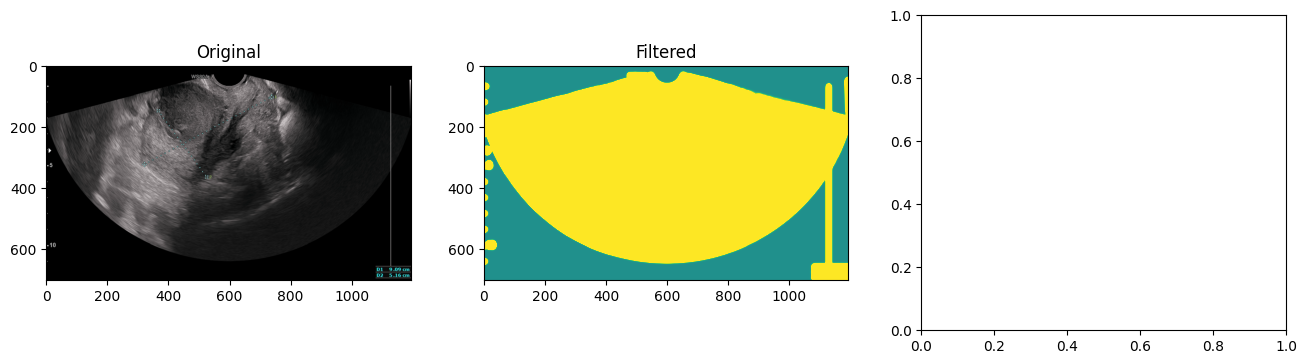

In [21]:
nimg = cv2.imread(f)

plt.figure(figsize=(16,9))
fimg=anisodiff(nimg,100,80,0.075,(1,1),2.5,1)
plt.subplot(2,3,1)
plt.imshow(nimg)
plt.title('Original')
plt.subplot(2,3,2)
plt.imshow(fimg,vmin=-1,vmax=1)
#plt.imshow(fimg)
plt.title('Filtered')
plt.subplot(2,3,3)
plt.imshow(fimg-nimg)
plt.title('Difference')
plt.subplot(2,3,4)
h=np.histogram(nimg,100)
plt.plot(h[0])

plt.subplot(2,3,5)
h,ax=np.histogram(fimg,100)

plt.plot(ax[0:(np.size(h))],h)

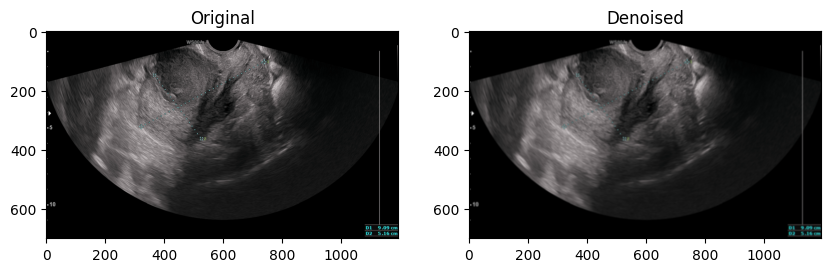

In [29]:
import cv2

# Load the image
image = cv2.imread(f)

# Apply Gaussian blur with a specified kernel size (e.g., 5x5)
# Adjust the kernel size (e.g., (5, 5)) and sigma value as needed
blurred_image = cv2.GaussianBlur(image, (5, 5), sigmaX=20)

# Display the original and blurred images
# cv2.imshow('Original Image', image)
# cv2.imshow('Blurred Image', blurred_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

display_images(image, blurred_image)

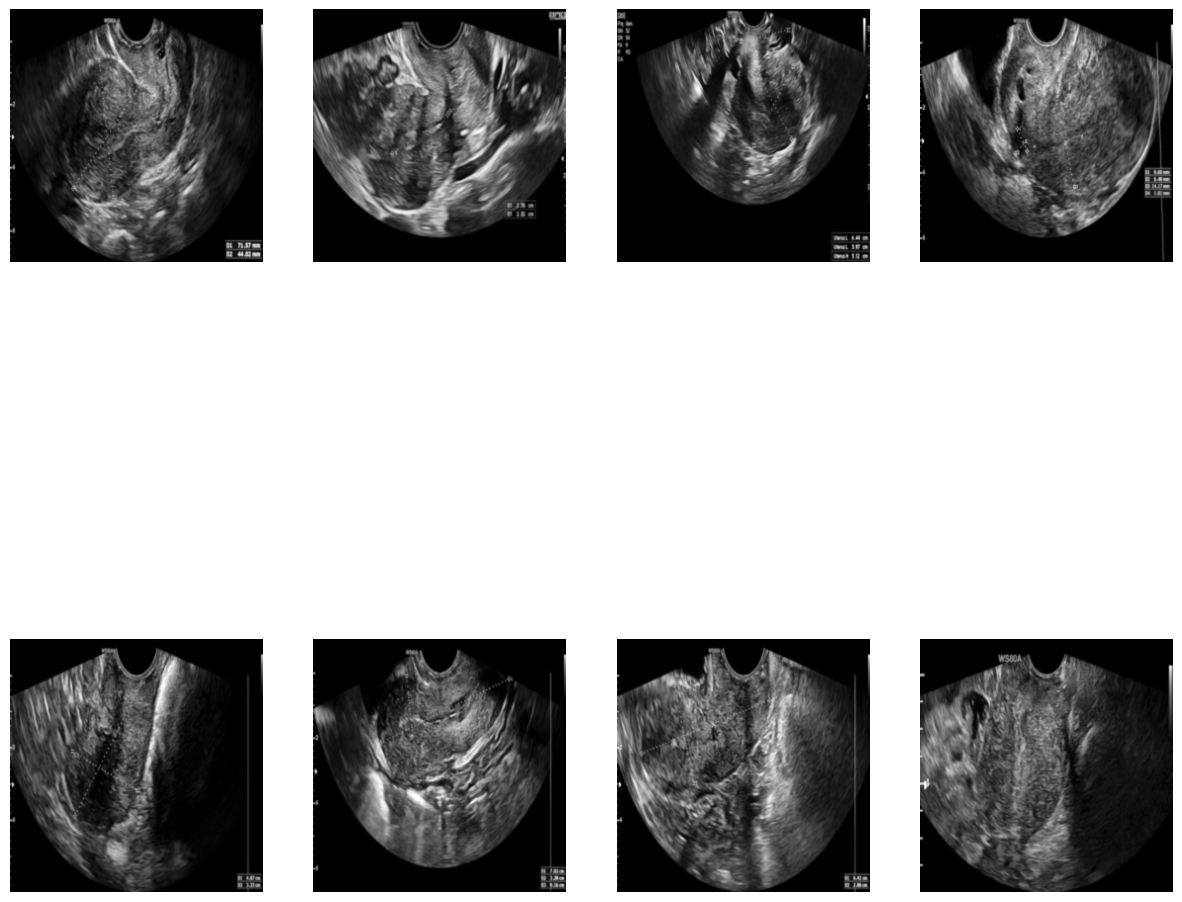

In [64]:
trans = transforms.Compose([transforms.Grayscale(),
                            transforms.GaussianBlur(5,  0.6),
                            transforms.ToTensor()])

img_size = 256
clahe = True
padding = False
batch_size = 8

STILL_train_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/train/', data_root_folder+'mask/train/', 'STILL', resize=img_size, clahe=clahe, padding=padding, transform=trans)
STILL_train_dataloader = DataLoader(STILL_train_dataset, batch_size=batch_size, shuffle=False)        

show_data(STILL_train_dataloader)

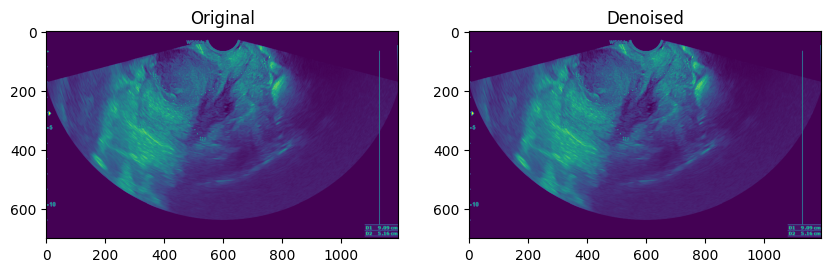

In [33]:
def normalize_image(image):
    # Convert the image to floating point
    image_float = image.astype(np.float32)
    
    # Normalize the image to the range [0, 1]
    normalized_image = (image_float - np.min(image_float)) / (np.max(image_float) - np.min(image_float))
    
    return normalized_image

# Load the image
image = cv2.imread(f, cv2.IMREAD_GRAYSCALE)

# Normalize the image
normalized_image = normalize_image(image)

display_images(image, normalized_image)

In [35]:
from torchvision import transforms

def get_mean_std(loader):
    # Compute the mean and standard deviation of all pixels in the dataset
    num_pixels = 0
    mean = 0.0
    std = 0.0
    for images, _ in loader:
        batch_size, num_channels, height, width = images.shape
        num_pixels += batch_size * height * width
        mean += images.mean(axis=(0, 2, 3)).sum()
        std += images.std(axis=(0, 2, 3)).sum()

    mean /= num_pixels
    std /= num_pixels

    return mean, std


trans = transforms.Compose([transforms.Grayscale(),
                            transforms.ToTensor()])

img_size = 256
clahe = False
padding = False
batch_size = 8

STILL_train_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/train/', data_root_folder+'mask/train/', 'STILL', resize=img_size, clahe=clahe, padding=padding, transform=trans)
STILL_train_dataloader = DataLoader(STILL_train_dataset, batch_size=batch_size, shuffle=True)        



mean, std = get_mean_std(STILL_train_dataloader)

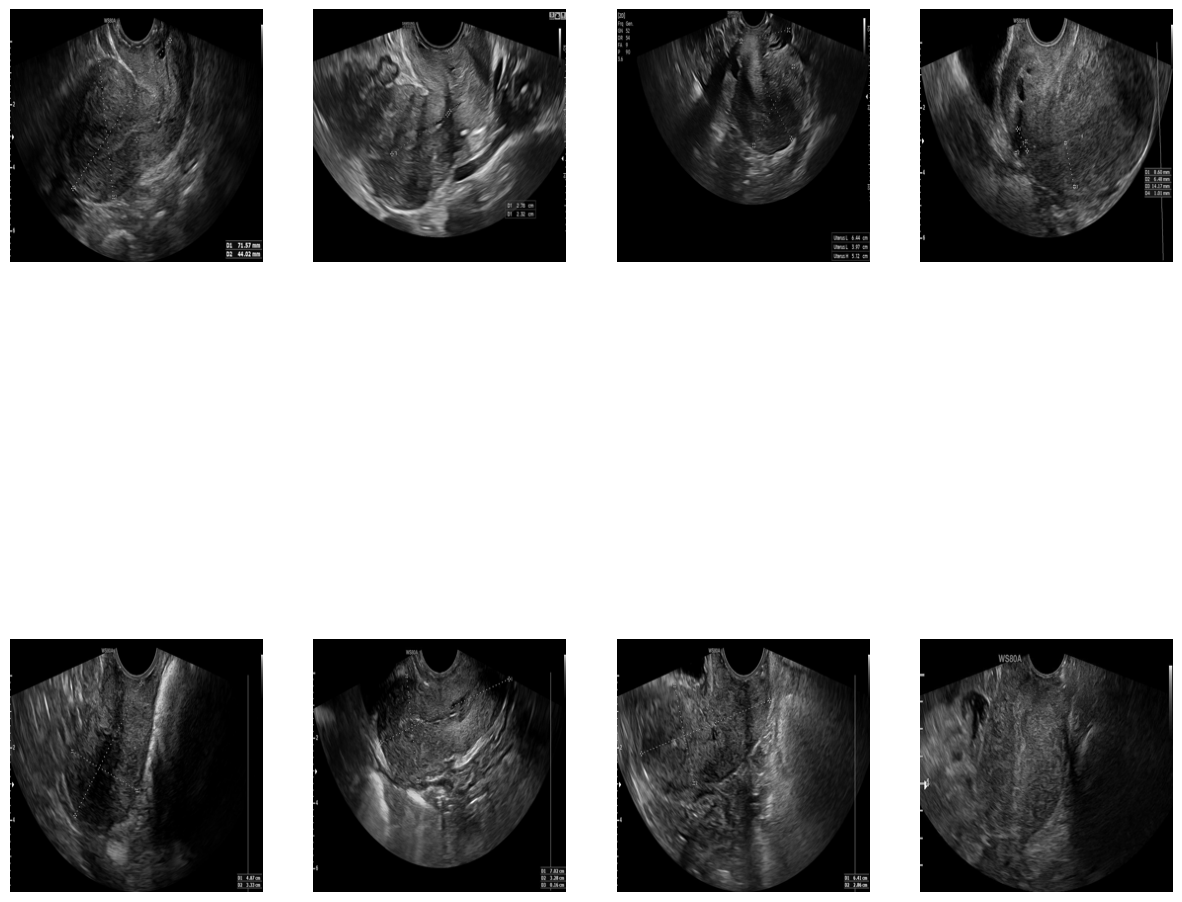

In [39]:

trans = transforms.Compose([transforms.Grayscale(),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=mean, std=std)])

img_size = 256
clahe = False
padding = False
batch_size = 8

STILL_train_dataset = TVUSUterusSegmentationDataset(data_root_folder+'original/train/', data_root_folder+'mask/train/', 'STILL', resize=img_size, clahe=clahe, padding=padding, transform=trans)
STILL_train_dataloader = DataLoader(STILL_train_dataset, batch_size=batch_size, shuffle=False)        

show_data(STILL_train_dataloader)

In [2]:
from torchvision import transforms
augs = transforms.Compose([         transforms.Grayscale(),
                                    transforms.GaussianBlur(5),  #0.6),
                                    # transforms.RandomApply([transforms.RandomRotation(5)], p=0.3),
                                    transforms.ToTensor(),
                                    # NonRandomHorizontalFlip(flip_probability=0.3)
                          ])

In [5]:
augs.transforms.append(transforms.Normalize(mean=1, std=1))

print(augs)

Compose(
    Grayscale(num_output_channels=1)
    GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
    ToTensor()
    Normalize(mean=1, std=1)
)
